In [11]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import bs4

# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
def get_pool_xml(poll_id):
    url='http://charts.realclearpolitics.com/charts/'+str(poll_id)+'.xml'
    content=requests.get(url).text
    return content

In [7]:
import re

def _strip(s):
    """This function removes non-letter characters from a word
    
    for example _strip('Hi there!') == 'Hi there'
    """
    return re.sub(r'[\W_]+', '', s)

In [136]:
def rcp_poll_data(xml):
    soup=bs4.BeautifulSoup(xml,'lxml')
    date=[]
    titlelist=[]
    datalist=[]
    Obama=[]
    Romney=[]
    
    for i in soup.series:
        date.append(i.text)
    for i in soup.graphs:
        titlelist.append(i.attrs['title'])
        index=int(i.attrs['gid'])-1
        templist=[]
        for j in i:
            templist.append(j.text)
        datalist.append(templist)
                
    result=pd.DataFrame({'date':pd.to_datetime(date)})
    for i in range(0,len(titlelist)):
        result[titlelist[i]]=datalist[i]
        
    for i in range(0,len(titlelist)):
        result=result[result.iloc[:,i+1]!='']
    
    for i in range(0,len(titlelist)):
        result.iloc[:,i+1]=result.iloc[:,i+1].astype(float)

    return result
xml=get_pool_xml(1051)
rcp_poll_data(xml)

,date,Christie,Corzine,Daggett
139,2009-09-15,45.3,38.2,7.3
140,2009-09-16,45.3,38.2,7.3
141,2009-09-17,45.3,38.2,7.3
142,2009-09-18,45.3,38.2,7.3
143,2009-09-19,45.3,38.2,7.3
144,2009-09-20,45.3,38.2,7.3
145,2009-09-21,45.3,38.2,7.3
146,2009-09-22,45.0,38.3,8.5
147,2009-09-23,45.0,38.3,8.5
148,2009-09-24,45.0,38.4,8.6


In [140]:
def plot_colors(xml):
    soup=bs4.BeautifulSoup(xml,'lxml')
    result={}
    for graph in soup.graphs:
        title=_strip(graph.attrs['title'])
        result[title]=graph.attrs['color']
    return result
xml=get_pool_xml(1051)
data=rcp_poll_data(xml)
colors=plot_colors(xml)
data[list(colors.keys())].sum()
print(colors)

{'Christie': '#D30015', 'Corzine': '#3B5998', 'Daggett': '#000000'}


In [2]:
def poll_plot(poll_id):
    """
    Make a plot of an RCP Poll over time
    
    Parameters
    ----------
    poll_id : int
        An RCP poll identifier
    """

    # hey, you wrote two of these functions. Thanks for that!
    xml = get_pool_xml(poll_id)
    data = rcp_poll_data(xml)
    colors = plot_colors(xml)

    #remove characters like apostrophes
    data = data.rename(columns = {c: _strip(c) for c in data.columns})

    #normalize poll numbers so they add to 100%    
    norm = data[list(colors.keys())].sum(axis=1) / 100    
    for c in list(colors.keys()):
        data[c] /= norm
    
    for label, color in colors.items():
        plt.plot(data.date, data[label], color=color, label=label)        
        
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.xlabel("Date")
    plt.ylabel("Normalized Poll Percentage")

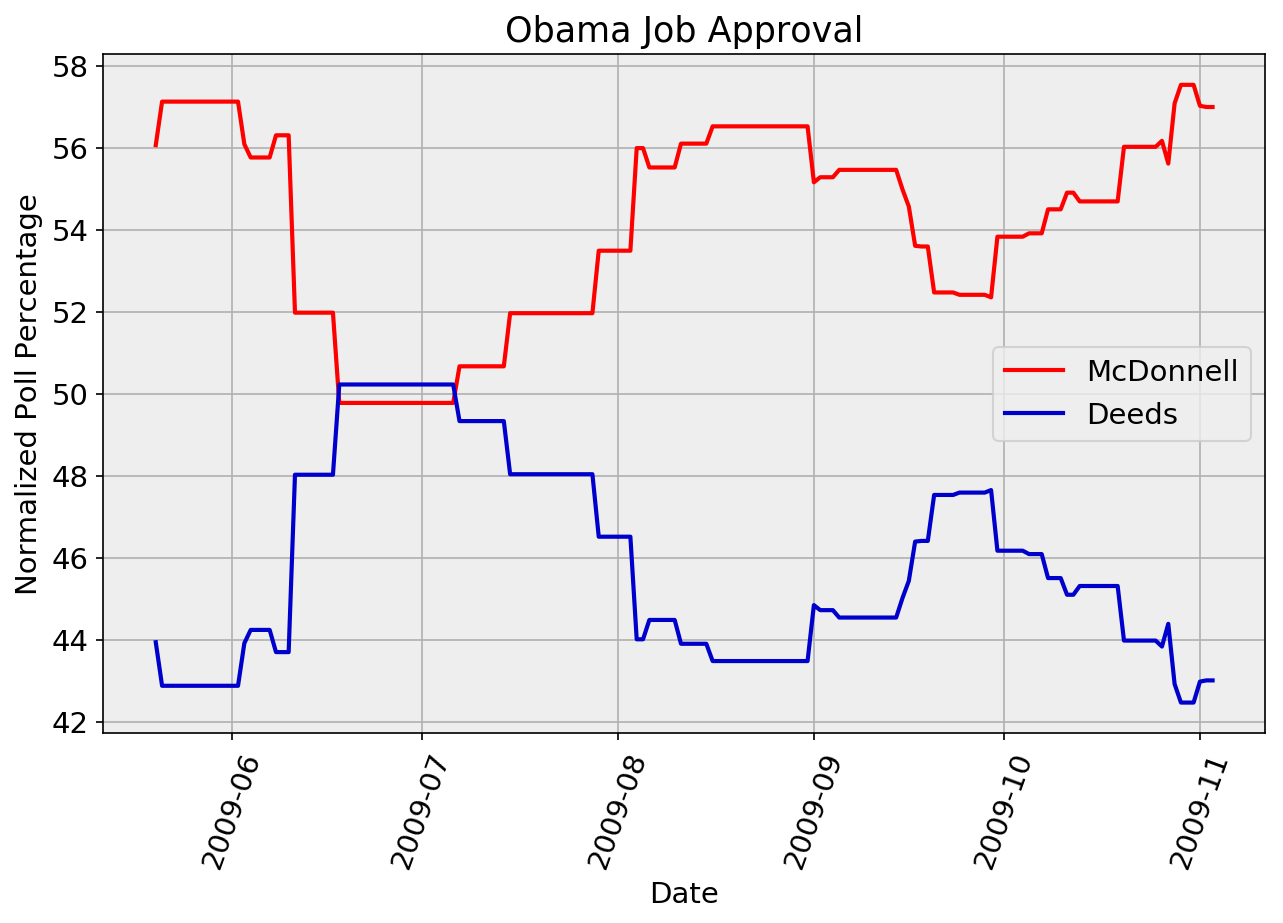

In [134]:
poll_plot(1055)
plt.title("Obama Job Approval")

In [7]:
import fnmatch
def ifmatch(data):
    file='http://www.realclearpolitics.com/epolls/????/governor/??/*-*.html'
    return fnmatch.fnmatch(data,file)
def find_governor_races(html):
    content=requests.get(html).text
    soup=bs4.BeautifulSoup(content,'lxml')
    data=[i['href'] for i in soup.findAll('a') if i.get('href')]
    data=[i for i in data if ifmatch(i)]
    return data
xml = 'http://www.realclearpolitics.com/epolls/2010/governor/2010_elections_governor_map.html'
find_governor_races(xml)

NameError: name 'requests' is not defined

In [85]:
def race_result(url):
    content=requests.get(url).text
    soup=bs4.BeautifulSoup(content,'lxml')
    table=soup.find('table',attrs={'class':'data'})
    
    name=table.findAll('tr')[0]
    name=[i.text for i in name][3:5]
    name=[i.split('(')[0].strip()  for i in name]
    
    score=table.findAll('tr')[1]
    score=[i.text for i in score][3:5]
    score=[float(i) for i in score]
    score=[i/sum(score)*100. for i in score]
    
    result={i:j for i,j in zip(name,score)}
    return(result)
    
url = 'http://www.realclearpolitics.com/epolls/2010/governor/ca/california_governor_whitman_vs_brown-1113.html'
race_result(url)

{'Brown': 56.0126582278481, 'Whitman': 43.98734177215189}

In [5]:
def id_from_url(url):
    """Given a URL, look up the RCP identifier number"""
    return url.split('-')[-1].split('.html')[0]


def plot_race(url):
    """Make a plot summarizing a senate race
    
    Overplots the actual race results as dashed horizontal lines
    """
    #hey, thanks again for these functions!
    id = id_from_url(url)
    xml = get_pool_xml(id)    
    colors = plot_colors(xml)

    if len(colors) == 0:
        return
    
    #really, you shouldn't have
    result = race_result(url)
    
    poll_plot(id)
    plt.xlabel("Date")
    plt.ylabel("Polling Percentage")
    for r in result:
        plt.axhline(result[r], color=colors[_strip(r)], alpha=0.6, ls='--')

In [9]:
page = 'http://www.realclearpolitics.com/epolls/2010/governor/ca/california_governor_whitman_vs_brown-1113.html'
find_governor_races(page)
#for race in find_governor_races(page):
#    plot_race(race)
#    plt.show()

NameError: name 'requests' is not defined

In [1]:
def party_from_color(color):
    if color in ['#0000CC', '#3B5998']:
        return 'democrat'
    if color in ['#FF0000', '#D30015']:
        return 'republican'
    return 'other'
def error_data(url):
    """
    Given a Governor race URL, download the poll data and race result,
    and construct a DataFrame with the following columns:
    
    candidate: Name of the candidate
    forecast_length: Number of days before the election
    percentage: The percent of poll votes a candidate has.
                Normalized to that the canddidate percentages add to 100%
    error: Difference between percentage and actual race reulst
    party: Political party of the candidate
    
    The data are resampled as necessary, to provide one data point per day
    """
    
    id = id_from_url(url)
    xml = get_poll_xml(id)
    
    colors = plot_colors(xml)
    if len(colors) == 0:
        return pd.DataFrame()
    
    df = rcp_poll_data(xml)
    result = race_result(url)
    
    #remove non-letter characters from columns
    df = df.rename(columns={c: _strip(c) for c in df.columns})
    for k, v in result.items():
        result[_strip(k)] = v 
    
    candidates = [c for c in df.columns if c is not 'date']
        
    #turn into a timeseries...
    df.index = df.date
    
    #...so that we can resample at regular, daily intervals
    df = df.resample('D')
    df = df.dropna()
    
    #compute forecast length in days
    #(assuming that last forecast happens on the day of the election, for simplicity)
    forecast_length = (df.date.max() - df.date).values
    forecast_length = forecast_length / np.timedelta64(1, 'D')  # convert to number of days
    
    #compute forecast error
    errors = {}
    normalized = {}
    poll_lead = {}
    
    for c in candidates:
        #turn raw percentage into percentage of poll votes
        corr = df[c].values / df[candidates].sum(axis=1).values * 100.
        err = corr - result[_strip(c)]
        
        normalized[c] = corr
        errors[c] = err
        
    n = forecast_length.size
    
    result = {}
    result['percentage'] = np.hstack(normalized[c] for c in candidates)
    result['error'] = np.hstack(errors[c] for c in candidates)
    result['candidate'] = np.hstack(np.repeat(c, n) for c in candidates)
    result['party'] = np.hstack(np.repeat(party_from_color(colors[_strip(c)]), n) for c in candidates)
    result['forecast_length'] = np.hstack(forecast_length for _ in candidates)
    
    result = pd.DataFrame(result)
    return result

In [2]:
def all_error_data():
    data = [error_data(race_page) for race_page in find_governor_races(page)]
    return pd.concat(data, ignore_index=True)

In [12]:
errors = all_error_data()

ValueError: No objects to concatenate